# Analysis and comparison of using different book series as a vocabulary builder when learning French through 1T sentence mining






<img src="banner.png" width=1000px align="left"/> 

    

    
 



---

## Overview

In this notebook, I will be comparing the effectiveness of using three different popular book series as a resource for learning French. The results from this analysis can be used by a learner looking to use a data-driven approach in deciding which series he/she should consider when beginning to read books in French.

## Background

Reading books is a fun and effective way to improve one's reading ability and vocabulary in a foreign language but it is also a daunting next-step in a language learner's journey. In beginning to read books in ones target-language (TL) a learner has to face the reality that their vocabulary and understanding of grammar may actually be much more limited than they may have thought. When reading their first book, a learner may encounter multiple sentences with words they've never seen before or read through entire chapters of a book without quite understanding the plot. A learner may even become so frustrated and dissapointed in their ability that they may decide that they're just not quite ready to read yet. Unfortunately there's no way to get around this: the only way to getter better at reading is to do more reading and the only way to build a good vocabulary is to learn words.

Fortunately, however, there is a strategy to make this transition period less painful and even fun: re-read some of your favourite childhood novels - but this time in your TL! 

We've all read novels during our adolescence that we wouldn't mind re-reading eventually, novels for which there may have even been a subsequent movie adaptation; novels for which we know the plot by heart. In re-reading these cherished novels we gain three principal benefits (1) we get to re-visit some of our favourite stories, (2) because we already know the story and the characters so well, it is very hard to lose the plot when reading in a foreign language (3) since these novels are usually targeted towards adolescents, the writing style/vocabulary/grammer is usually not too difficult for language learners.

## Terminology

### (1T) Sentence Mining

[Sentence-Mining](https://refold.la/roadmap/stage-2/a/basic-sentence-mining) is the practice of collecting (mining) sentences in a foreign language that a language-learner would like to study. A sentence is said to be 1T when the learner is able to understand every word in the sentence except for exactly one. 1T sentences are very commonly used to build flashcards where, the front of the card contains the 1T sentence and the back of the card contains the definition (or translation) of the previously unknown word. From mining each 1T sentence, looking up the meaning of each unknown word and building flashcards from these sentence/definiton pairs, a learner can very quickly build up their vocabulary in a foreign language through reading books.

The reason for using 1T sentences to learn vocabulary rather than 2T, 3T, etc sentences is because 1T sentences are quite easy to learn from since all you're missing is one word. It is also more useful to keep the entire sentence along with the word rather than just keeping the word because the sentence gives the word context and gives the learner a hint what the word may mean when reviewing their flashcards.

### Word Frequency

Not all words are equal when learning a foreign language. In every language spoken by humans, there are some words that are very useful and are used in nearly every sentence (eg. 'the', 'a', 'I', 'there', etc.) and then there are some words that are less useful and used rarely (eg. 'platypus', 'kleptocracy', 'opprobrium', 'antiestablishmentarianism', etc.). Obviously for language learners (and for children with their native languages), it makes much more sense to learn and master more commonly used words before moving onto more rare ones. Conveniently, there exists word-frequency lists on the internet for various languages that order words based on their frequencies - this is useful for determining how useful or common a given word is.

## Methodology

### Data

In this analysis, specifically, I will be looking at the French translations of the first three books from the following three popular series:

- Harry Potter 
- Hunger Games
- Percy Jackson

Each of these series have been widely read by many adults during their childhood and adapted into popular movie franchises making their respective plots widely known. Chances are, if you're an adult in your twenties and you were a reader in your childhood, you probably read at least one of these series. And if you didn't happen to read the books, you may have seen the movies and thus know the plot through watching the films.

The first three Harry Potter books contains a cumulative total of 374,775 words, the three Hunger Games books: 399,875 and the first three Percy Jackson books: 332,687 words; putting them roughly in the same ball park in terms of size. These books were also written for roughly the same age groups (9-13).

In this analysis, I will assume that, to begin with, the learner knows all of the 5,000 most common French words in the [Lexique](http://www.lexique.org/shiny/openlexicon/) frequency list but is ignorant of all other words. (*This is a naive assumption due to the similarity of conjugation forms and French-English cognates which will yield, in turn, a more conservative conclusion since it will provide a lower bound for how many words a learner would actually learn in practice from reading these books.*) An initial vocabulary of 5,000 words is assumed as this represents the vocabulary of a typical French learner around the upper-beginner/lower-intermediate stages of their studies which is also the stage at which many French learners begin reading their first books in French.

### Simulation

Three seperate simulations will be performed on each of the three aforementioned series each beginning with the first book, proceeding one chapter at a time. Each simulation will replicate that of a French learner beginning with a limited vocabulary of 5,000 French words, learning words found in 1T sentences found in each chapter. More precisely, the simulation proceeds chapter by chapter saving each and every 1T sentence encountered in the current chapter given the simulation's current vocabulary. And at the end of each chapter, each unknown word found in the collected 1T sentences of the chapter is 'learned' and added to the vocabulary before proceeding to the next chapter and repeating the same process. 

Along the way, other statistics will be recorded allowing for an in-deph analysis at the end of the simulation.

### Results

To carry out this analysis, I will be comparing each book series according to four different criteria:

1. The **Quantity** of words learned after reading each series
2. The **Quality** of the words learned: median frequency of learned words
3. The **Difficulty** of each series: mean percentage of unknown words per chapter
4. The **Efficiency** of using these series to build a French-learner's vocabulary: average percentage of words learned per unknown words encountered each chapter (because the simulated learner only learns words contained in 1T sentences, they do not learn unknown words found in 2T, 3T,... sentences despite encountering them each chapter)

After the simulation, I will rank each series with the above criteria with the following highly objective emojis: 🥇🥈🥉

-*I should also note that when comparing the given 'statistics' taken at the end of each simulation, there is no need to employ any of the common statistical tests to compare the medians or means through the Kruskal-Wallis or ANOVA tests. This is because the statistics taken at the end of each simulation are neither random, nor taken on a proper random sample. The statistics taken at the end can be assumed to be constant and thus it is completely proper to compare the statistics given the number alone.*

---

## Analysis

In [1]:
#required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#initial vocab size
VOCAB_SIZE_INIT = 5000

In [3]:
#generates some useful statistics
def generate_statistics(learned_words_data):
    
    learned_words_data['Learned_Words'] = learned_words_data['Vocab_After'] - learned_words_data['Vocab_Before']
    
    learned_words_data['Perc_Unknown'] = 100 * learned_words_data['Num_Unknown'] / learned_words_data['Num_Words']
    
    learned_words_data['Learned_per_Unknown'] = 100 * learned_words_data['Learned_Words'] / learned_words_data['Num_Unknown']

### Load the data

In [4]:
#harry potter data
learned_words_data_HP = pd.read_csv('Harry Potter/learned_words_data.csv')
known_words_HP = pd.read_csv('Harry Potter/known_words.csv', index_col=0)

#hunger games data
learned_words_data_HG = pd.read_csv('Hunger Games/learned_words_data.csv')
known_words_HG = pd.read_csv('Hunger Games/known_words.csv', index_col=0)

#percy jackson data
learned_words_data_PJ = pd.read_csv('Percy Jackson/learned_words_data.csv')
known_words_PJ = pd.read_csv('Percy Jackson/known_words.csv', index_col=0)

### Modify the data

In [5]:
#generates some useful statistics for each series

generate_statistics(learned_words_data_PJ)

generate_statistics(learned_words_data_HG)

generate_statistics(learned_words_data_HP)

In [6]:
#generate the words and their corresponding frequency scores
#of the words that were learned in each series

learned_words_HP = known_words_HP.loc[VOCAB_SIZE_INIT+1:]
learned_words_HP = learned_words_HP.loc[learned_words_HP['known'] ==1,]

learned_words_HG = known_words_HG.loc[VOCAB_SIZE_INIT+1:]
learned_words_HG = learned_words_HG.loc[learned_words_HG['known'] ==1,]

learned_words_PJ = known_words_PJ.loc[VOCAB_SIZE_INIT+1:]
learned_words_PJ = learned_words_PJ.loc[learned_words_PJ['known'] ==1,]

---

### Quantity

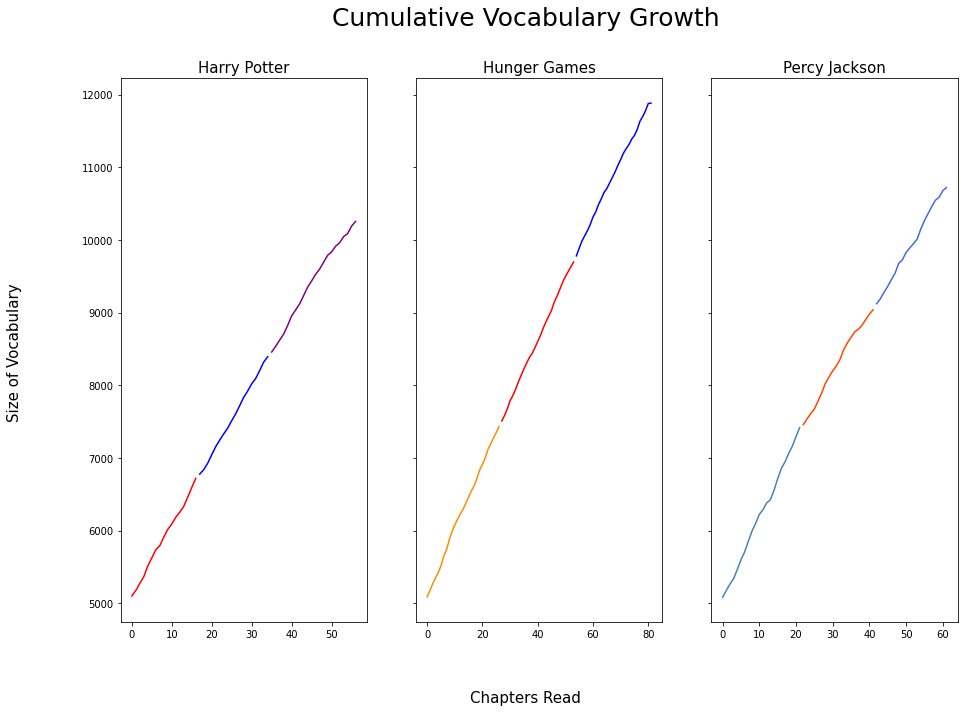

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.set_figheight(10)
fig.set_figwidth(15)

#harry potter
ax1.plot(learned_words_data_HP.loc[learned_words_data_HP['Book']==1,].index, learned_words_data_HP.loc[learned_words_data_HP['Book']==1, 'Vocab_After'], color='red')
ax1.plot(learned_words_data_HP.loc[learned_words_data_HP['Book']==2,].index, learned_words_data_HP.loc[learned_words_data_HP['Book']==2, 'Vocab_After'], color='blue')
ax1.plot(learned_words_data_HP.loc[learned_words_data_HP['Book']==3,].index, learned_words_data_HP.loc[learned_words_data_HP['Book']==3, 'Vocab_After'], color='purple')
ax1.set_title('Harry Potter', fontsize=15)

#hunger games
ax2.plot(learned_words_data_HG.loc[learned_words_data_HG['Book']==1,].index, learned_words_data_HG.loc[learned_words_data_HG['Book']==1, 'Vocab_After'], color='darkorange')
ax2.plot(learned_words_data_HG.loc[learned_words_data_HG['Book']==2,].index, learned_words_data_HG.loc[learned_words_data_HG['Book']==2, 'Vocab_After'], color='red')
ax2.plot(learned_words_data_HG.loc[learned_words_data_HG['Book']==3,].index, learned_words_data_HG.loc[learned_words_data_HG['Book']==3, 'Vocab_After'], color='blue')
ax2.set_title('Hunger Games', fontsize=15)

#percy jackson
ax3.plot(learned_words_data_PJ.loc[learned_words_data_PJ['Book']==1,].index, learned_words_data_PJ.loc[learned_words_data_PJ['Book']==1, 'Vocab_After'], color='steelblue')
ax3.plot(learned_words_data_PJ.loc[learned_words_data_PJ['Book']==2,].index, learned_words_data_PJ.loc[learned_words_data_PJ['Book']==2, 'Vocab_After'], color='orangered')
ax3.plot(learned_words_data_PJ.loc[learned_words_data_PJ['Book']==3,].index, learned_words_data_PJ.loc[learned_words_data_PJ['Book']==3, 'Vocab_After'], color='royalblue')
ax3.set_title('Percy Jackson', fontsize=15)

fig.suptitle('Cumulative Vocabulary Growth', fontsize=25)
fig.supylabel('Size of Vocabulary', fontsize=15)
fig.supxlabel('Chapters Read', fontsize=15)

plt.show()

**Observation**: As we can see from the above graphs, the learner's vocabulary seems to grow linearly regardless of which series they read.

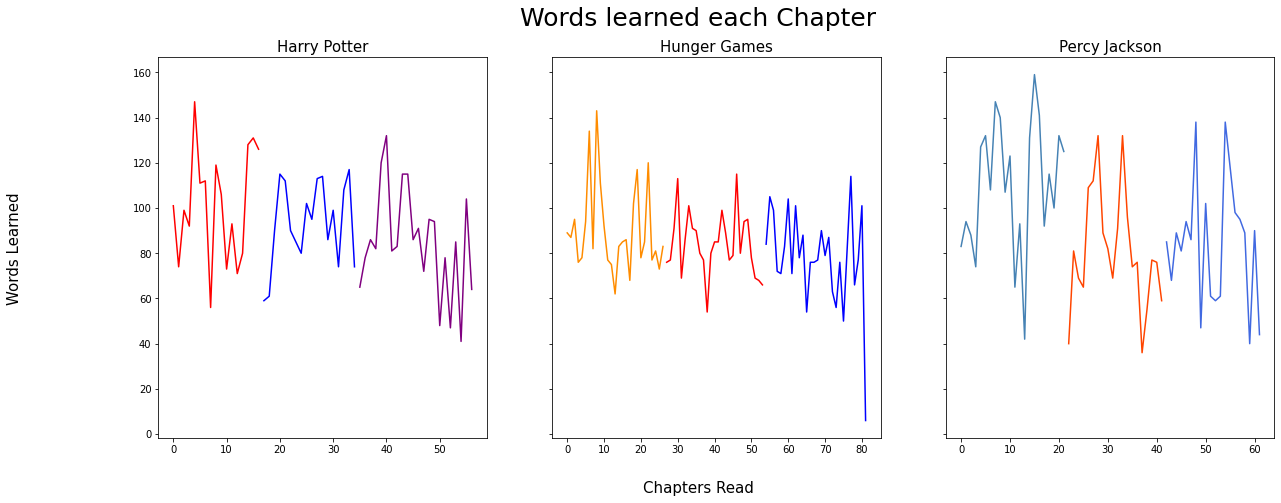

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.set_figheight(7)
fig.set_figwidth(20)

#harry potter
ax1.plot(learned_words_data_HP.loc[learned_words_data_HP['Book']==1,].index, learned_words_data_HP.loc[learned_words_data_HP['Book']==1, 'Learned_Words'], color='red')
ax1.plot(learned_words_data_HP.loc[learned_words_data_HP['Book']==2,].index, learned_words_data_HP.loc[learned_words_data_HP['Book']==2, 'Learned_Words'], color='blue')
ax1.plot(learned_words_data_HP.loc[learned_words_data_HP['Book']==3,].index, learned_words_data_HP.loc[learned_words_data_HP['Book']==3, 'Learned_Words'], color='purple')
ax1.set_title('Harry Potter', fontsize=15)

#hunger games
ax2.plot(learned_words_data_HG.loc[learned_words_data_HG['Book']==1,].index, learned_words_data_HG.loc[learned_words_data_HG['Book']==1, 'Learned_Words'], color='darkorange')
ax2.plot(learned_words_data_HG.loc[learned_words_data_HG['Book']==2,].index, learned_words_data_HG.loc[learned_words_data_HG['Book']==2, 'Learned_Words'], color='red')
ax2.plot(learned_words_data_HG.loc[learned_words_data_HG['Book']==3,].index, learned_words_data_HG.loc[learned_words_data_HG['Book']==3, 'Learned_Words'], color='blue')
ax2.set_title('Hunger Games', fontsize=15)

#percy jackson
ax3.plot(learned_words_data_PJ.loc[learned_words_data_PJ['Book']==1,].index, learned_words_data_PJ.loc[learned_words_data_PJ['Book']==1, 'Learned_Words'], color='steelblue')
ax3.plot(learned_words_data_PJ.loc[learned_words_data_PJ['Book']==2,].index, learned_words_data_PJ.loc[learned_words_data_PJ['Book']==2, 'Learned_Words'], color='orangered')
ax3.plot(learned_words_data_PJ.loc[learned_words_data_PJ['Book']==3,].index, learned_words_data_PJ.loc[learned_words_data_PJ['Book']==3, 'Learned_Words'], color='royalblue')
ax3.set_title('Percy Jackson', fontsize=15)

fig.suptitle('Words learned each Chapter', fontsize=25)
fig.supylabel('Words Learned', fontsize=15)
fig.supxlabel('Chapters Read', fontsize=15)

plt.show()

**Observation**: If we look at the number of words learned each chapter, we see that it remains fairly constant from chapter to chapter. This is what explains the linear increase in cumulative vocabulary in the previous plots.

Also, the reason for the steep drop in words learned at the end of the final chapter in the Hunger Games series is because that chapter is super short relative to the others.

#### Conclusion:

In terms of sheer number of words learned during the simulation, the Hunger Games comes out on top with a final vocabulary size of 11,883 (6,883 words learned), followed by Percy Jackson with 10,721 (5,721 words learned), then Harry Potter with 10,255 (5,255 words learned).



**Quantity**: 

- Hunger Games: 🥇
- Percy Jackson: 🥈
- Harry Potter: 🥉

---

### Difficulty

Below, the difficulty of a given chapter is measured by the percentage of unknown words per words it contains: difficulty = # of unknown words / # of words in each chapter. Furthermore, the difficulty of a given series will be measured by it's mean difficulty.

In [9]:
#compute the means

#harry potter
mean_diff_HP = np.mean(learned_words_data_HP['Perc_Unknown'])
#hunger games
mean_diff_HG = np.mean(learned_words_data_HG['Perc_Unknown'])
#percy jackson
mean_diff_PJ = np.mean(learned_words_data_PJ['Perc_Unknown'])

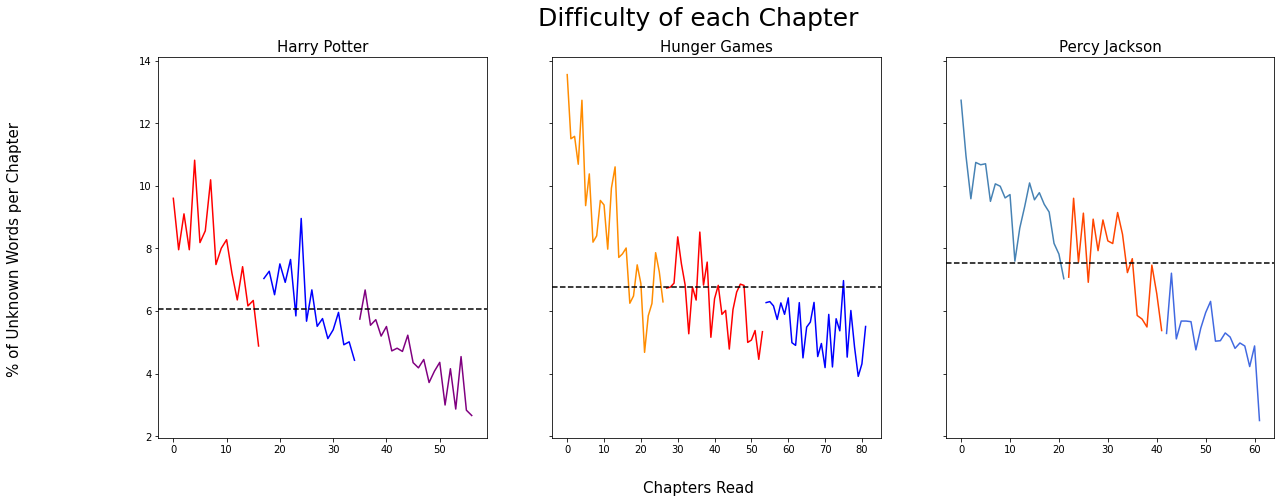

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.set_figheight(7)
fig.set_figwidth(20)

#harry potter
ax1.plot(learned_words_data_HP.loc[learned_words_data_HP['Book']==1,].index, learned_words_data_HP.loc[learned_words_data_HP['Book']==1, 'Perc_Unknown'], color='red')
ax1.plot(learned_words_data_HP.loc[learned_words_data_HP['Book']==2,].index, learned_words_data_HP.loc[learned_words_data_HP['Book']==2, 'Perc_Unknown'], color='blue')
ax1.plot(learned_words_data_HP.loc[learned_words_data_HP['Book']==3,].index, learned_words_data_HP.loc[learned_words_data_HP['Book']==3, 'Perc_Unknown'], color='purple')
ax1.axhline(y=mean_diff_HP, color='black', linestyle='--')
ax1.set_title('Harry Potter', fontsize=15)

#hunger games
ax2.plot(learned_words_data_HG.loc[learned_words_data_HG['Book']==1,].index, learned_words_data_HG.loc[learned_words_data_HG['Book']==1, 'Perc_Unknown'], color='darkorange')
ax2.plot(learned_words_data_HG.loc[learned_words_data_HG['Book']==2,].index, learned_words_data_HG.loc[learned_words_data_HG['Book']==2, 'Perc_Unknown'], color='red')
ax2.plot(learned_words_data_HG.loc[learned_words_data_HG['Book']==3,].index, learned_words_data_HG.loc[learned_words_data_HG['Book']==3, 'Perc_Unknown'], color='blue')
ax2.axhline(y=mean_diff_HG, color='black', linestyle='--')
ax2.set_title('Hunger Games', fontsize=15)

#percy jackson
ax3.plot(learned_words_data_PJ.loc[learned_words_data_PJ['Book']==1,].index, learned_words_data_PJ.loc[learned_words_data_PJ['Book']==1, 'Perc_Unknown'], color='steelblue')
ax3.plot(learned_words_data_PJ.loc[learned_words_data_PJ['Book']==2,].index, learned_words_data_PJ.loc[learned_words_data_PJ['Book']==2, 'Perc_Unknown'], color='orangered')
ax3.plot(learned_words_data_PJ.loc[learned_words_data_PJ['Book']==3,].index, learned_words_data_PJ.loc[learned_words_data_PJ['Book']==3, 'Perc_Unknown'], color='royalblue')
ax3.axhline(y=mean_diff_PJ, color='black', linestyle='--')
ax3.set_title('Percy Jackson', fontsize=15)

fig.suptitle('Difficulty of each Chapter', fontsize=25)
fig.supylabel('% of Unknown Words per Chapter', fontsize=15)
fig.supxlabel('Chapters Read', fontsize=15)

plt.show()

**Observation**: Despite the fact that roughly the same amount of vocabulary is learned each chapter, we can see that the there is a clear downward trend in difficulty per chapter in each of the series. The reason for this is because, as your vocabulary grows through learning from 1T sentences, sentences that would have previously been 2T, 3T,... become 1T. So the more vocabulary you learn, the more 1T sentences you encounter and so the words learned per chapter will not decrease until your vocabulary is much much larger.

One cool thing to note is the way in which each series becomes less difficult as more vocabulary is learned. Within each Harry Potter book, the difficulty goes down steadily then briefly rises when the simulation starts reading the next book. I believe this has to do with each book becoming more mature as the main protagonists age. In the Hunger Games series there is a sharp drop thoughout the first book, then the rest of the series' difficulty drops much more slowly. Finally in the Percy Jackson series, there is just one nicely behaved steady trend downwards in difficulty.

Also note that there happens to be a slight rise between books. This shows that each book tends to contain systematically different vocabulary than that of the previous book or that each book becomes harder than the previous one (which is certainly the case for Harry Potter).

In [11]:
print('\nHarry Potter mean difficulty per chapter:', mean_diff_HP)
print('\nHunger Games mean difficulty per chapter:', mean_diff_HG)
print('\nPercy Jackson mean difficulty per chapter:', mean_diff_PJ)


Harry Potter mean difficulty per chapter: 6.0670509889399655

Hunger Games mean difficulty per chapter: 6.779872754698641

Percy Jackson mean difficulty per chapter: 7.521602925172493


#### Conclusion:

From the above computations, we can see that the least difficult series is Harry Potter with an average difficulty of 6.07 (on average 6.07% of the words are unknown in each chapter), followed by the Hunger Games with an average difficuly of 6.78 and Percy Jackson with an average difficulty of 7.52.

**Difficulty**: 

- Harry Potter: 🥇
- Hunger Games: 🥈
- Percy Jackson: 🥉

---

### Quality

The quality of a word is it's frequency. The more frequent a word is (lower frequency index eg. 5, 300, 5641), the higher in quality it is considered.

In [12]:
#compute the medians

#harry potter
median_freq_HP = np.median(learned_words_HP.index)
#hunger games
median_freq_HG = np.median(learned_words_HG.index)
#percy jackson
median_freq_PJ = np.median(learned_words_PJ.index)

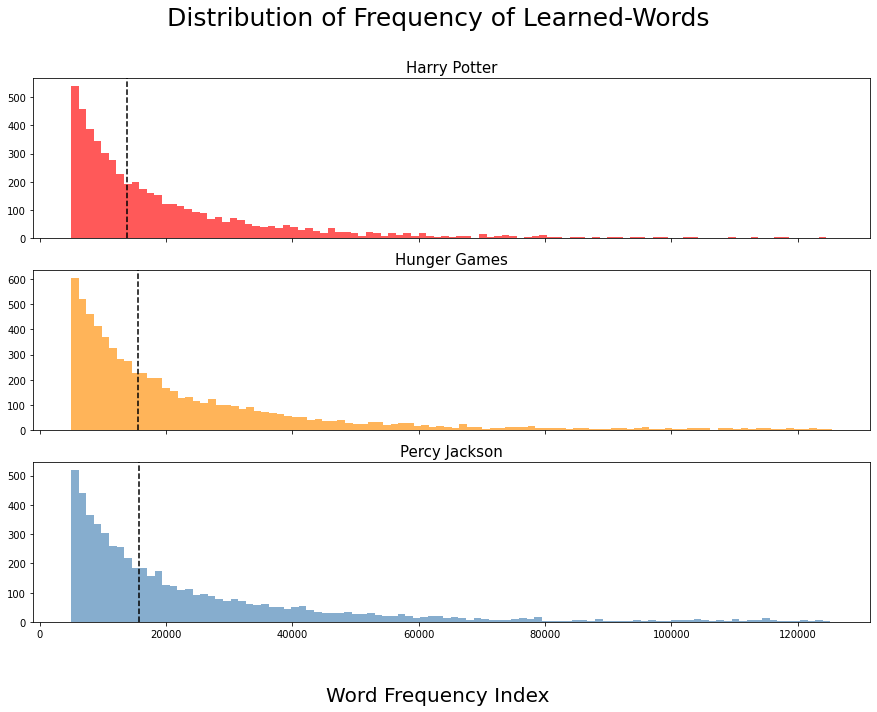

In [13]:
#plot the word frequency distributions and the medians

num_bins = 100

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

fig.set_figheight(10)
fig.set_figwidth(15)

#harry potter
ax1.hist(learned_words_HP.index, num_bins, color='red', alpha=0.65)
ax1.axvline(x=median_freq_HP, color='black', linestyle='--')
ax1.set_title('Harry Potter', fontsize=15)

#hunger games
ax2.hist(learned_words_HG.index, num_bins, color='darkorange', alpha=0.65)
ax2.axvline(x=median_freq_HG, color='black', linestyle='--')
ax2.set_title('Hunger Games', fontsize=15)

#percy jackson
ax3.hist(learned_words_PJ.index, num_bins, color='steelblue', alpha=0.65)
ax3.axvline(x=median_freq_PJ, color='black', linestyle='--')
ax3.set_title('Percy Jackson', fontsize=15)

fig.suptitle('Distribution of Frequency of Learned-Words', fontsize=25)
fig.supxlabel('Word Frequency Index', fontsize=20)

plt.show()

**Observation**: As you would expect, most of the words learned are of higher frequency (lower index) with much fewer rare words of lower frequency (higher index).

In [14]:
print('\nHarry Potter median frequency index:', median_freq_HP)
print('\nHunger Games median frequency index:', median_freq_HG)
print('\nPercy Jackson median frequency index:', median_freq_PJ)


Harry Potter median frequency index: 13856.0

Hunger Games median frequency index: 15664.5

Percy Jackson median frequency index: 15673.5


#### Conclusion:

In reading Harry Potter, you tend to learn more common words than with the Hunger Games or with Percy Jackson

**Quality**:

- Harry Potter: 🥇
- Hunger Games: 🥈
- Percy Jackson: 🥉

---

# Efficiency

Of all the unknown words encountered in each chapter, how many are we actually learning? If we are encountering lots of unknown words that belong to >1T sentences then these are words we are not learning and thus there is waste or inefficiency. It is most efficient when most unknown words are found in 1T sentences and thus we learn the majority of these unknown words. So efficiency here is defined as efficiency = # words learned / # of unknown words encountered each chapter.

In [15]:
#compute the means

#harry potter
mean_eff_HP = np.mean(learned_words_data_HP['Learned_per_Unknown'])
#hunger games
mean_eff_HG = np.mean(learned_words_data_HG['Learned_per_Unknown'])
#percy jackson
mean_eff_PJ = np.mean(learned_words_data_PJ['Learned_per_Unknown'])

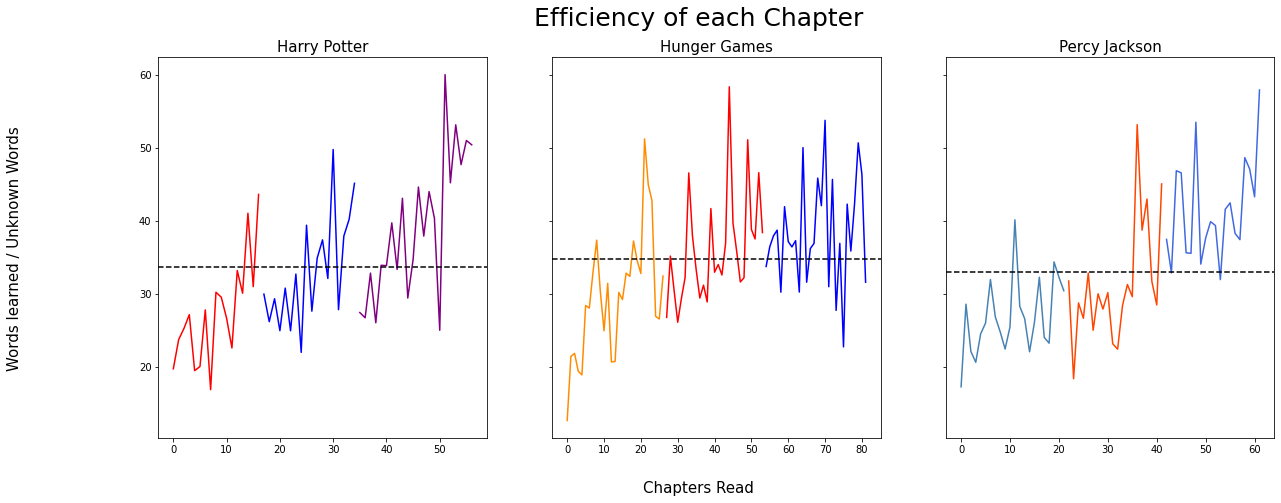

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.set_figheight(7)
fig.set_figwidth(20)

#harry potter
ax1.plot(learned_words_data_HP.loc[learned_words_data_HP['Book']==1,].index, learned_words_data_HP.loc[learned_words_data_HP['Book']==1, 'Learned_per_Unknown'], color='red')
ax1.plot(learned_words_data_HP.loc[learned_words_data_HP['Book']==2,].index, learned_words_data_HP.loc[learned_words_data_HP['Book']==2, 'Learned_per_Unknown'], color='blue')
ax1.plot(learned_words_data_HP.loc[learned_words_data_HP['Book']==3,].index, learned_words_data_HP.loc[learned_words_data_HP['Book']==3, 'Learned_per_Unknown'], color='purple')
ax1.axhline(y=mean_eff_HP, color='black', linestyle='--')
ax1.set_title('Harry Potter', fontsize=15)

#hunger games
ax2.plot(learned_words_data_HG.loc[learned_words_data_HG['Book']==1,].index, learned_words_data_HG.loc[learned_words_data_HG['Book']==1, 'Learned_per_Unknown'], color='darkorange')
ax2.plot(learned_words_data_HG.loc[learned_words_data_HG['Book']==2,].index, learned_words_data_HG.loc[learned_words_data_HG['Book']==2, 'Learned_per_Unknown'], color='red')
ax2.plot(learned_words_data_HG.loc[learned_words_data_HG['Book']==3,].index, learned_words_data_HG.loc[learned_words_data_HG['Book']==3, 'Learned_per_Unknown'], color='blue')
ax2.axhline(y=mean_eff_HG, color='black', linestyle='--')
ax2.set_title('Hunger Games', fontsize=15)

#percy jackson
ax3.plot(learned_words_data_PJ.loc[learned_words_data_PJ['Book']==1,].index, learned_words_data_PJ.loc[learned_words_data_PJ['Book']==1, 'Learned_per_Unknown'], color='steelblue')
ax3.plot(learned_words_data_PJ.loc[learned_words_data_PJ['Book']==2,].index, learned_words_data_PJ.loc[learned_words_data_PJ['Book']==2, 'Learned_per_Unknown'], color='orangered')
ax3.plot(learned_words_data_PJ.loc[learned_words_data_PJ['Book']==3,].index, learned_words_data_PJ.loc[learned_words_data_PJ['Book']==3, 'Learned_per_Unknown'], color='royalblue')
ax3.axhline(y=mean_eff_PJ, color='black', linestyle='--')
ax3.set_title('Percy Jackson', fontsize=15)

fig.suptitle('Efficiency of each Chapter', fontsize=25)
fig.supylabel('Words learned / Unknown Words', fontsize=15)
fig.supxlabel('Chapters Read', fontsize=15)

plt.show()

**Observation**: As you would expect, the more vocabulary that is acquired, the more sentences with unknown words become 1T and thus the percentage of unknown words appearing in 1T sentences increases.

In [17]:
print('\nHarry Potter mean efficiency per chapter:', mean_eff_HP)
print('\nHunger Games mean efficiency per chapter:', mean_eff_HG)
print('\nPercy Jackson mean efficiency per chapter:', mean_eff_PJ)


Harry Potter mean efficiency per chapter: 33.698610634757976

Hunger Games mean efficiency per chapter: 34.72624493423706

Percy Jackson mean efficiency per chapter: 32.97003236148429


#### Conclusion:

In terms of efficiency, the Hunger Games series is the most efficient series to learn words from (on average 34.73% of unknown words encountered each chapter are learned as they apear in 1T sentences) followed by Harry Potter with an efficiency of 33.7% and Percy Jackson with 32.97%.

**Efficiency**: 

- Hunger Games: 🥇
- Harry Potter: 🥈
- Percy Jackson: 🥉

---

Thanks for reading!